<a href="https://colab.research.google.com/github/ArashiNilou/0224-Data/blob/main/Diabetes_AN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.11.0 statannot==0.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from scipy.stats import kruskal
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importer le dataframe
df = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

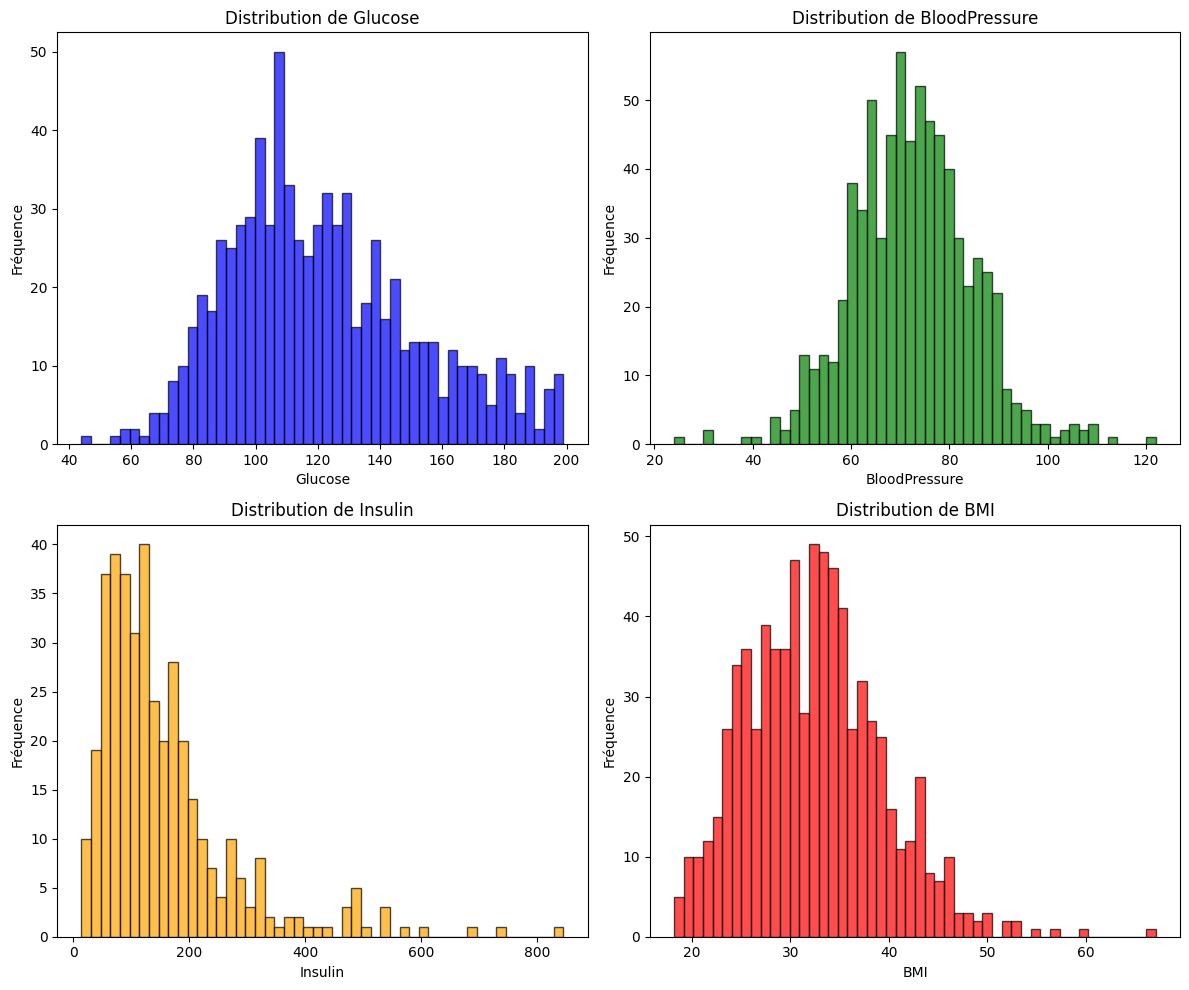

In [10]:
# Création du plot avec 4 subplots pour voir la distribution de mes colonne contenant des 0.
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot de la distribution de Glucose
axs[0, 0].hist(df['Glucose'][df['Glucose'] != 0], bins=50, edgecolor='k', alpha=0.7, color='blue')
axs[0, 0].set_title('Distribution de Glucose')
axs[0, 0].set_xlabel('Glucose')
axs[0, 0].set_ylabel('Fréquence')

# distribution de BloodPressure
axs[0, 1].hist(df['BloodPressure'][df['BloodPressure'] != 0], bins=50, edgecolor='k', alpha=0.7, color='green')
axs[0, 1].set_title('Distribution de BloodPressure')
axs[0, 1].set_xlabel('BloodPressure')
axs[0, 1].set_ylabel('Fréquence')

# distribution de Insulin
axs[1, 0].hist(df['Insulin'][df['Insulin'] != 0], bins=50, edgecolor='k', alpha=0.7, color='orange')
axs[1, 0].set_title('Distribution de Insulin')
axs[1, 0].set_xlabel('Insulin')
axs[1, 0].set_ylabel('Fréquence')

# distribution de BMI
axs[1, 1].hist(df['BMI'][df['BMI'] != 0], bins=50, edgecolor='k', alpha=0.7, color='red')
axs[1, 1].set_title('Distribution de BMI')
axs[1, 1].set_xlabel('BMI')
axs[1, 1].set_ylabel('Fréquence')

# Ajustement des subplots pour éviter le chevauchement
plt.tight_layout()

plt.show()

In [11]:
# Mesure des Skewness
df[['Glucose', 'BloodPressure', 'Insulin','BMI']].skew()

Glucose          0.173754
BloodPressure   -1.843608
Insulin          2.272251
BMI             -0.428982
dtype: float64

L'interprétation des valeurs de skewness (asymétrie) pour décider de remplacer les valeurs nulles (zéros) par la moyenne ou la médiane dépend de la distribution des données. Voici comment interpréter chaque valeur de skewness et prendre une décision appropriée :

Skewness proche de 0 : Les données sont à peu près symétriques. La moyenne et la médiane sont proches l'une de l'autre. Utiliser la moyenne ou la médiane est généralement acceptable.

Skewness négative (inférieure à -1) : Les données sont asymétriques à gauche (queue longue à gauche). Il est préférable d'utiliser la médiane pour remplacer les valeurs nulles.

Skewness positive (supérieure à 1) : Les données sont asymétriques à droite (queue longue à droite). Il est préférable d'utiliser la médiane pour remplacer les valeurs nulles.

**Interprétation des Skewness des colonnes**

Glucose (skewness = 0.173754) :

La skewness est proche de 0, indiquant une distribution à peu près symétrique. Vous pouvez utiliser soit la moyenne, soit la médiane pour remplacer les zéros.

BloodPressure (skewness = -1.843608) :

La skewness est fortement négative, indiquant une distribution asymétrique à gauche. Il est préférable d'utiliser la médiane pour remplacer les zéros.

Insulin (skewness = 2.272251) :

La skewness est fortement positive, indiquant une distribution asymétrique à droite. Il est préférable d'utiliser la médiane pour remplacer les zéros.

BMI (skewness = -0.428982) :

La skewness est légèrement négative, mais proche de 0. Nous pouvons utiliser soit la moyenne, soit la médiane pour remplacer les zéros.

In [12]:
# Remplacer les zéros par la moyenne ou la médiane selon la skewness
columns_skewness = {
    'Glucose': 0.173754,
    'BloodPressure': -1.843608,
    'Insulin': 2.272251,
    'BMI': -0.428982
}

for column, skewness in columns_skewness.items():
    if abs(skewness) < 1:  # Skewness proche de 0 : utiliser la moyenne
        replacement_value = df[df[column] != 0][column].mean()
    else:  # Skewness éloignée de 0 : utiliser la médiane
        replacement_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, replacement_value)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

An error occurred: invalid index to scalar variable.


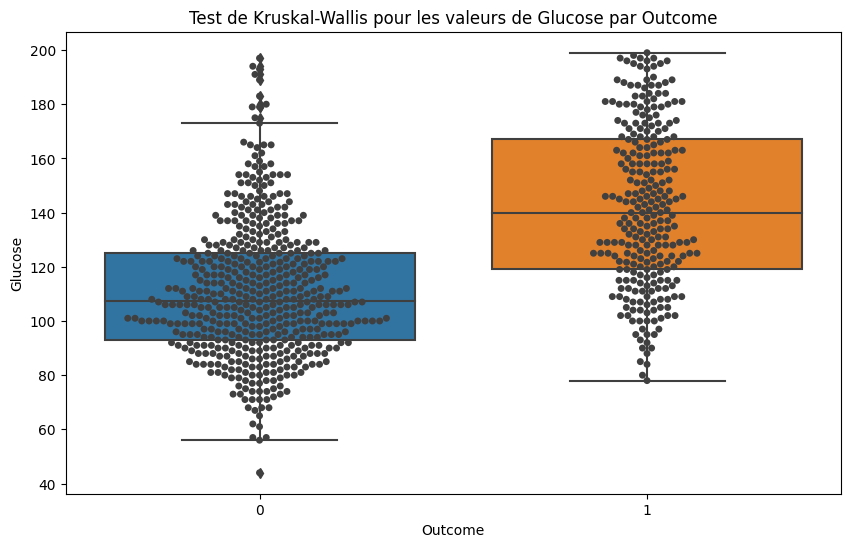

Comparaison Outcome 0 vs Outcome 1: Statistique = 177.91876321395745, p-value = 1.3799172833750725e-40


In [13]:
# Créer une boîte à moustaches avec seaborn en utilisant Outcome comme groupe
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Outcome', y='Glucose', data=df)
ax = sns.swarmplot(x='Outcome', y='Glucose', data=df, color=".25")

# Ajouter des annotations de p-value avec statannot
test_pairs = [(0, 1)]

# Utiliser try-except pour capturer les erreurs potentielles
try:
    add_stat_annotation(ax, data=df, x='Outcome', y='Glucose',
                        box_pairs=test_pairs,
                        test='Kruskal', text_format='star', loc='outside', verbose=2)
except IndexError as e:
    print(f"An error occurred: {e}")

plt.title('Test de Kruskal-Wallis pour les valeurs de Glucose par Outcome')
plt.show()

# Effectuer le test de Kruskal-Wallis pour la colonne Glucose en fonction de Outcome
group1 = df[df['Outcome'] == 0]['Glucose']
group2 = df[df['Outcome'] == 1]['Glucose']
stat, p_value = kruskal(group1, group2)
print(f'Comparaison Outcome 0 vs Outcome 1: Statistique = {stat}, p-value = {p_value}')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

An error occurred: invalid index to scalar variable.


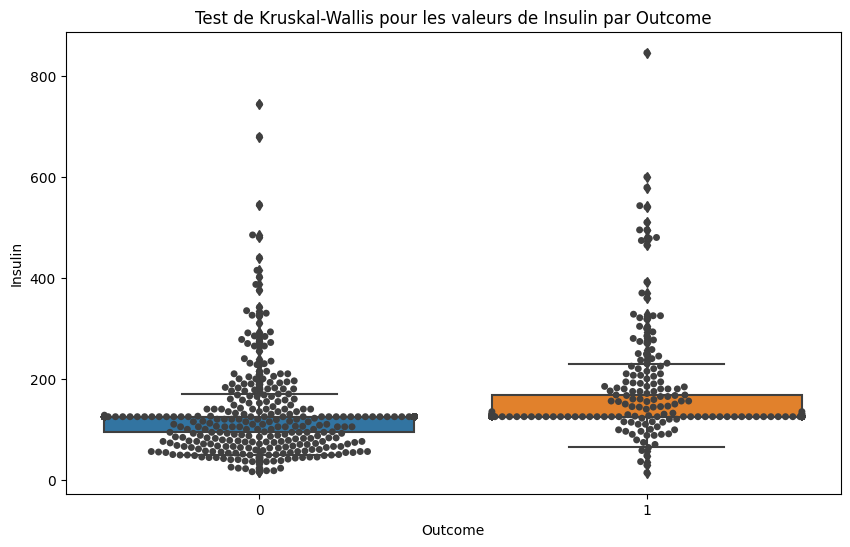

Comparaison Outcome 0 vs Outcome 1: Statistique = 57.76311336696682, p-value = 2.956624129699043e-14


In [14]:
# Créer une boîte à moustaches avec seaborn en utilisant Outcome comme groupe
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Outcome', y='Insulin', data=df)
ax = sns.swarmplot(x='Outcome', y='Insulin', data=df, color=".25")

# Ajouter des annotations de p-value avec statannot
test_pairs = [(0, 1)]

# Utiliser try-except pour capturer les erreurs potentielles
try:
    add_stat_annotation(ax, data=df, x='Outcome', y='Insulin',
                        box_pairs=test_pairs,
                        test='Kruskal', text_format='star', loc='outside', verbose=2)
except IndexError as e:
    print(f"An error occurred: {e}")

plt.title('Test de Kruskal-Wallis pour les valeurs de Insulin par Outcome')
plt.show()

# Effectuer le test de Kruskal-Wallis pour la colonne Glucose en fonction de Outcome
group1 = df[df['Outcome'] == 0]['Insulin']
group2 = df[df['Outcome'] == 1]['Insulin']
stat, p_value = kruskal(group1, group2)
print(f'Comparaison Outcome 0 vs Outcome 1: Statistique = {stat}, p-value = {p_value}')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

An error occurred: invalid index to scalar variable.


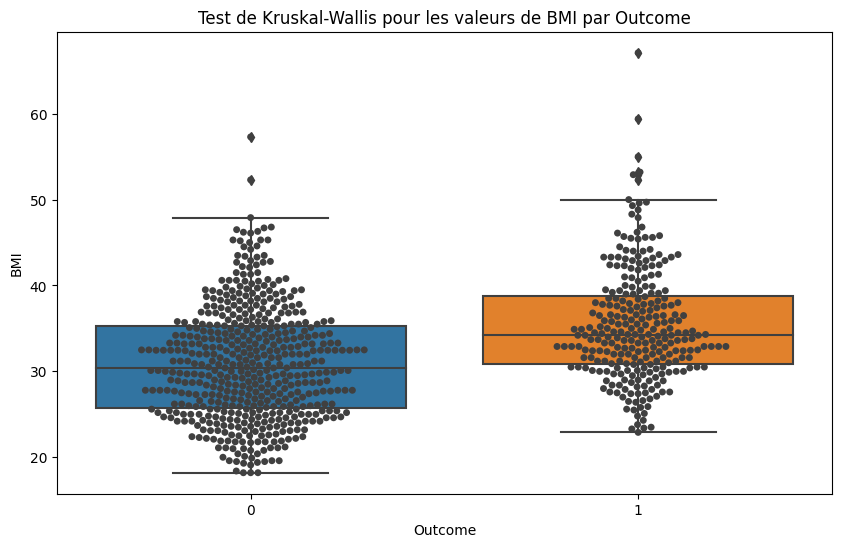

Comparaison Outcome 0 vs Outcome 1: Statistique = 72.08986553867277, p-value = 2.056170315635966e-17


In [15]:
# Créer une boîte à moustaches avec seaborn en utilisant Outcome comme groupe
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Outcome', y='BMI', data=df)
ax = sns.swarmplot(x='Outcome', y='BMI', data=df, color=".25")

# Ajouter des annotations de p-value avec statannot
test_pairs = [(0, 1)]

# Utiliser try-except pour capturer les erreurs potentielles
try:
    add_stat_annotation(ax, data=df, x='Outcome', y='BMI',
                        box_pairs=test_pairs,
                        test='Kruskal', text_format='star', loc='outside', verbose=2)
except IndexError as e:
    print(f"An error occurred: {e}")

plt.title('Test de Kruskal-Wallis pour les valeurs de BMI par Outcome')
plt.show()

# Effectuer le test de Kruskal-Wallis pour la colonne Glucose en fonction de Outcome
group1 = df[df['Outcome'] == 0]['BMI']
group2 = df[df['Outcome'] == 1]['BMI']
stat, p_value = kruskal(group1, group2)
print(f'Comparaison Outcome 0 vs Outcome 1: Statistique = {stat}, p-value = {p_value}')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

An error occurred: invalid index to scalar variable.


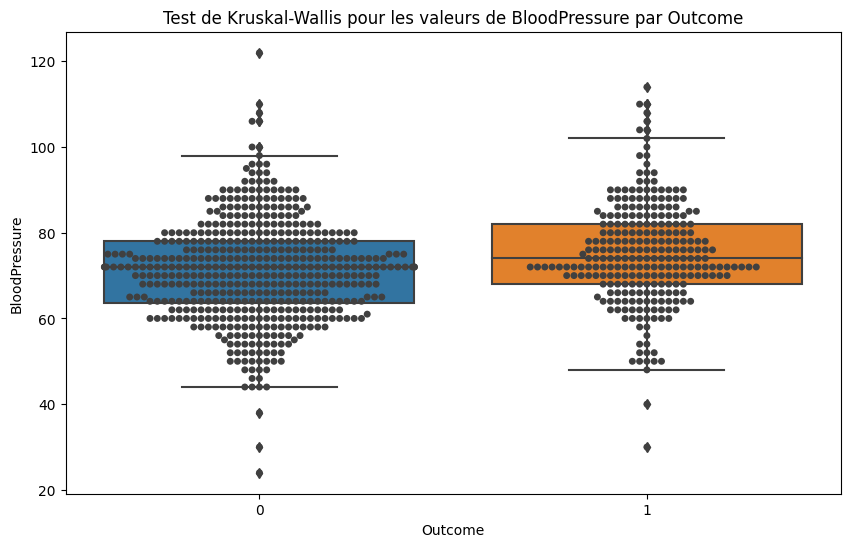

Comparaison Outcome 0 vs Outcome 1: Statistique = 22.38390521417873, p-value = 2.2323695647889944e-06


In [16]:
# Créer une boîte à moustaches avec seaborn en utilisant Outcome comme groupe
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Outcome', y='BloodPressure', data=df)
ax = sns.swarmplot(x='Outcome', y='BloodPressure', data=df, color=".25")

# Ajouter des annotations de p-value avec statannot
test_pairs = [(0, 1)]

# Utiliser try-except pour capturer les erreurs potentielles
try:
    add_stat_annotation(ax, data=df, x='Outcome', y='BloodPressure',
                        box_pairs=test_pairs,
                        test='Kruskal', text_format='star', loc='outside', verbose=2)
except IndexError as e:
    print(f"An error occurred: {e}")

plt.title('Test de Kruskal-Wallis pour les valeurs de BloodPressure par Outcome')
plt.show()

# Effectuer le test de Kruskal-Wallis pour la colonne Glucose en fonction de Outcome
group1 = df[df['Outcome'] == 0]['BloodPressure']
group2 = df[df['Outcome'] == 1]['BloodPressure']
stat, p_value = kruskal(group1, group2)
print(f'Comparaison Outcome 0 vs Outcome 1: Statistique = {stat}, p-value = {p_value}')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

An error occurred: invalid index to scalar variable.


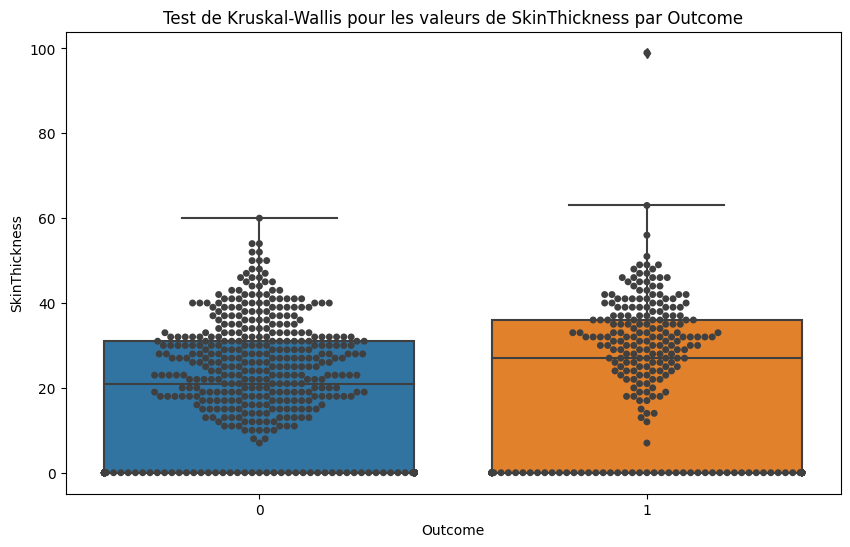

Comparaison Outcome 0 vs Outcome 1: Statistique = 6.17517143811817, p-value = 0.012955535668789868


In [17]:
# Créer une boîte à moustaches avec seaborn en utilisant Outcome comme groupe
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Outcome', y='SkinThickness', data=df)
ax = sns.swarmplot(x='Outcome', y='SkinThickness', data=df, color=".25")

# Ajouter des annotations de p-value avec statannot
test_pairs = [(0, 1)]

# Utiliser try-except pour capturer les erreurs potentielles
try:
    add_stat_annotation(ax, data=df, x='Outcome', y='SkinThickness',
                        box_pairs=test_pairs,
                        test='Kruskal', text_format='star', loc='outside', verbose=2)
except IndexError as e:
    print(f"An error occurred: {e}")

plt.title('Test de Kruskal-Wallis pour les valeurs de SkinThickness par Outcome')
plt.show()

# Effectuer le test de Kruskal-Wallis pour la colonne Glucose en fonction de Outcome
group1 = df[df['Outcome'] == 0]['SkinThickness']
group2 = df[df['Outcome'] == 1]['SkinThickness']
stat, p_value = kruskal(group1, group2)
print(f'Comparaison Outcome 0 vs Outcome 1: Statistique = {stat}, p-value = {p_value}')

## Donc SkinThickness  n'est pas un marqueur pour le Diabète. Donc Drop

In [18]:
df.drop(columns= 'SkinThickness', inplace=True)

In [19]:
# Afficher la matrice de corrélation avec une heatmap
fig = px.imshow(df.corr(),
                text_auto=True,
                aspect="auto",
                color_continuous_scale='blues',
                title='Matrice de corrélation')
# Ajuster la taille de la figure pour qu'elle soit carrée
fig.update_layout(
    width=800,
    height=800
)
fig.show()

px.imshow est utilisé pour créer une heatmap à partir de la matrice de corrélation.


text_auto=True permet d'afficher les valeurs de corrélation directement sur la heatmap.


aspect="auto" ajuste l'aspect de la heatmap.


In [20]:
# Une vue globale des variables
fig = px.scatter_matrix(
    df,
    dimensions=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age'],
    color='Outcome',
    color_continuous_scale='bluered'
)

fig.update_layout(
    width=1200,
    height=1000
)

fig.show()

In [21]:
# Visualisation des outliers en concidérant les zéros
fig = px.box(df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
                'DiabetesPedigreeFunction', 'Age']], title='Visualisation des Outliers')
fig.show()

In [22]:
# Visualisation des outliers en concidérant les zéros
fig = px.box(df['Insulin'], title='Visualisation des Outliers de Insulin')
fig.show()

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


variables = ['Pregnancies', 'Glucose', 'BloodPressure',
 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Créer une figure avec sous-graphiques
fig = make_subplots(rows=2, cols=4, subplot_titles=variables)

# Ajouter un box plot pour chaque variable
for i, var in enumerate(variables):
    row = i // 4 + 1
    col = i % 4 + 1
    fig.add_trace(
        go.Box(y=df[df['Outcome'] == 0][var], name='Non Malade', marker_color='blue'),
        row=row, col=col
    )
    fig.add_trace(
        go.Box(y=df[df['Outcome'] == 1][var], name='Malade', marker_color='red'),
        row=row, col=col
    )

# Mettre à jour la disposition de la figure
fig.update_layout(height=600, width=1000, title_text="Comparaison des diagnostics pour chaque variable")
fig.show()


In [32]:
# faire le test Kruskal-Wallis encore pour toute mes variables
for var in df.columns:
  group1 = df[df['Outcome'] == 0][var]
  group2 = df[df['Outcome'] == 1][var]
  p_value = kruskal(group1, group2)
  print(var, p_value)

Pregnancies KruskalResult(statistic=30.279026997235565, pvalue=3.7414975961260366e-08)
Glucose KruskalResult(statistic=177.91876321395745, pvalue=1.3799172833750725e-40)
BloodPressure KruskalResult(statistic=22.38390521417873, pvalue=2.2323695647889944e-06)
Insulin KruskalResult(statistic=57.76311336696682, pvalue=2.956624129699043e-14)
BMI KruskalResult(statistic=72.08986553867277, pvalue=2.056170315635966e-17)
DiabetesPedigreeFunction KruskalResult(statistic=23.584359800813168, pvalue=1.1955533210178133e-06)
Age KruskalResult(statistic=73.25301341585387, pvalue=1.1405091208575826e-17)
Outcome KruskalResult(statistic=767.0000000000005, pvalue=8.07317150316437e-169)


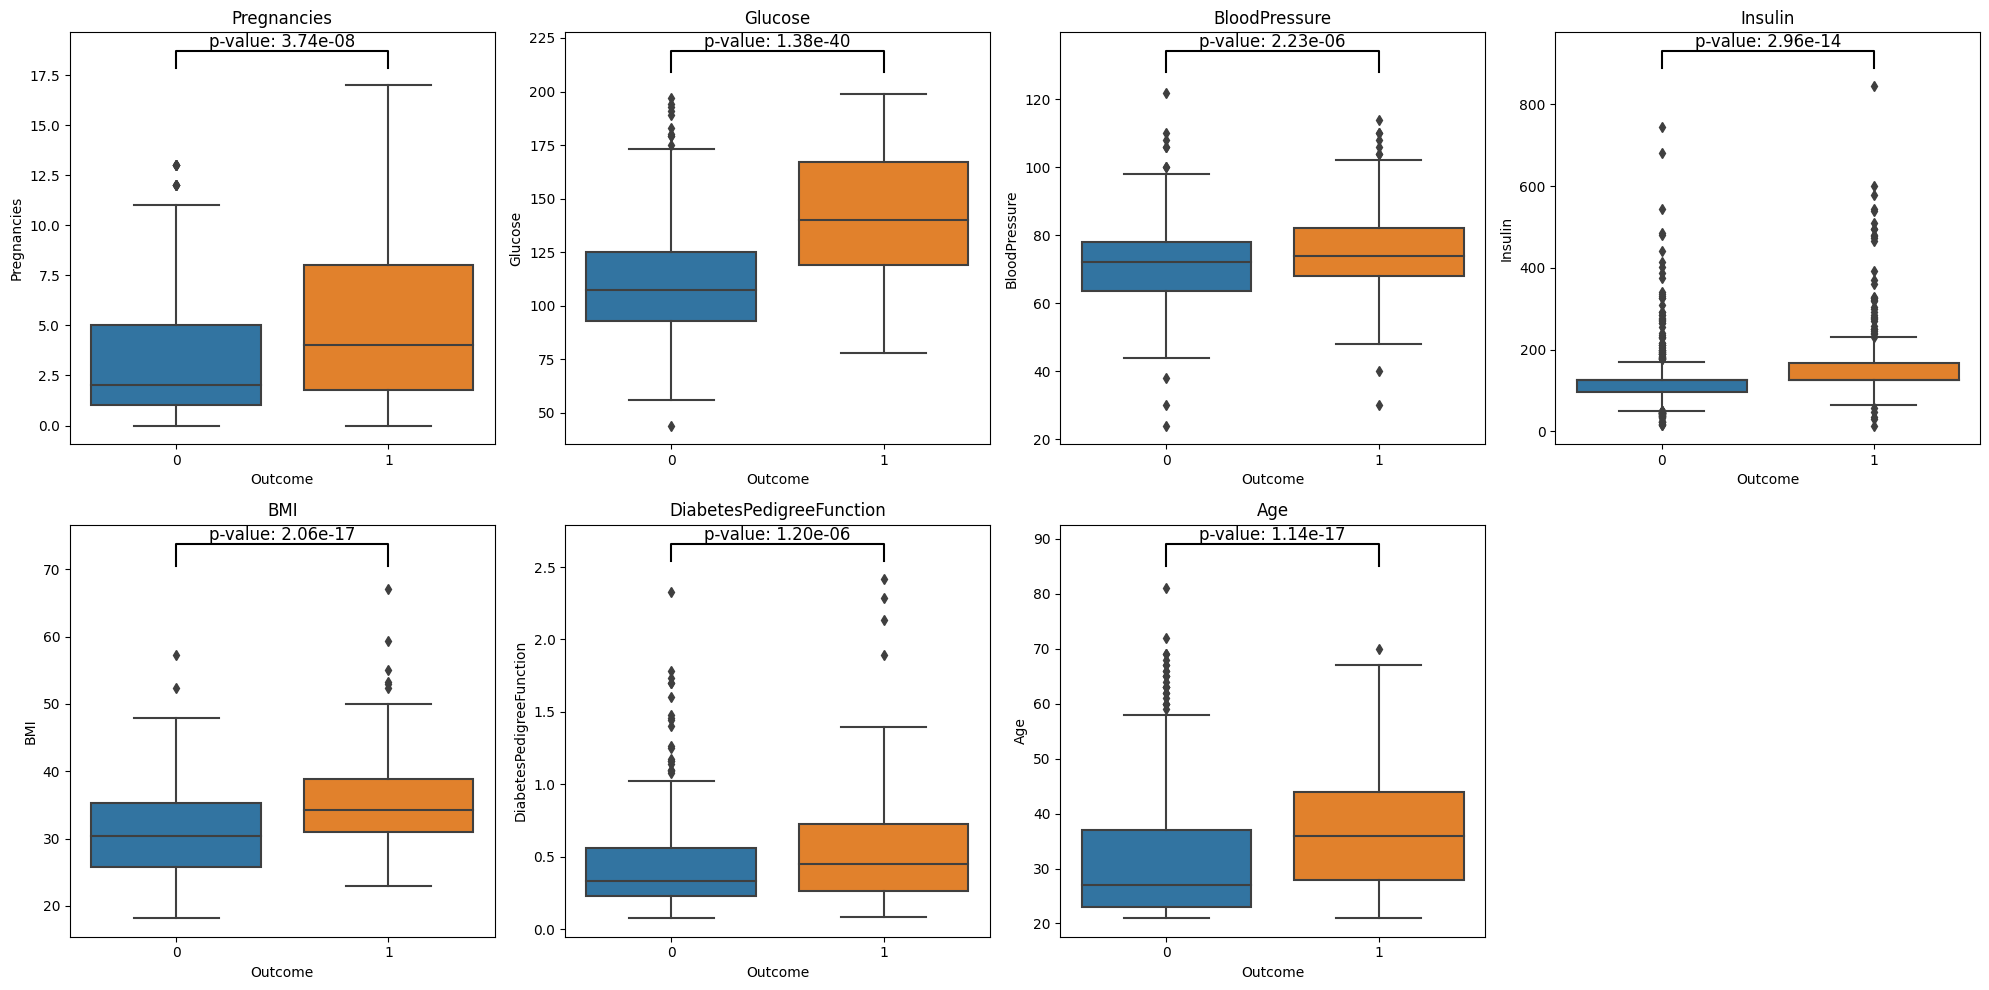

In [36]:
# Visualiser mes variables dans un seul plot en indiquant le resultat de Krusal-Wallis test  un grand merci à chatGPT
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outcome_column = 'Outcome'

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(x=outcome_column, y=column, data=df, ax=axes[i])
    stat, pvalue = kruskal(df[df[outcome_column] == 0][column], df[df[outcome_column] == 1][column])
    max_value = df[column].max()
    y, h, col = max_value + (max_value * 0.05), max_value * 0.05, 'k'
    axes[i].plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
    axes[i].text(0.5, y+h, f'p-value: {pvalue:.2e}', ha='center', va='bottom', color=col, fontsize=12)
    axes[i].set_title(column)

fig.delaxes(axes[-1])
plt.tight_layout()

plt.show()